# Exploratory Data Analysis : Haberman's Survival

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's 
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Haberman Dataset

- 305 datapoints/records
- 4 fearures includeing class label

# Feature Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

# Objective : 
To predict a patient survival after 5 years based on patient's age, operation year and the number of positive lymph nodes who had undergone surgery for breast cancer.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

haberman.head()


30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1

# Observation(s):

    * Column names are missing in the dataset.
    * Need to add column names in dataset.

In [2]:
# Add column names for the dataset

haberman.columns = ["age", "operation_year", "lymph_node", "survival_status"]

haberman.head()

age  operation_year  lymph_node  survival_status
0   30              62           3                1
1   30              65           0                1
2   31              59           2                1
3   31              65           4                1
4   33              58          10                1

In [3]:
# (Q) how many data-points and features?
print (haberman.shape)

(305, 4)


In [4]:
#(Q) What are the column names in our dataset?

print (haberman.columns)

Index(['age', 'operation_year', 'lymph_node', 'survival_status'], dtype='object')


In [5]:
#(Q) How many data points for each class are present? 
#(Q) How many patients survived more than 5 years and how many died within 5 years?
haberman["survival_status"].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

# Observation(s):

    * It is an unbalanced dataset
    * After operation performed, out of 305 people 224 survived more than 5 years and 81 died in less than 5 years.


In [6]:
# (Q) Display the statistical summary of data.

haberman.describe()

age  operation_year  lymph_node  survival_status
count  305.000000      305.000000  305.000000       305.000000
mean    52.531148       62.849180    4.036066         1.265574
std     10.744024        3.254078    7.199370         0.442364
min     30.000000       58.000000    0.000000         1.000000
25%     44.000000       60.000000    0.000000         1.000000
50%     52.000000       63.000000    1.000000         1.000000
75%     61.000000       66.000000    4.000000         2.000000
max     83.000000       69.000000   52.000000         2.000000

# Observation(s):  

    * The Age of the patients vary from 30 to 83 with the mean of 52.
    * Maximum number of positive lymph nodes observed is 52, around 75% of the patients have less than 5 positive lymph nodes and 25% of the patients have no positive lymph node.

# 2-D Scatter Plot : 

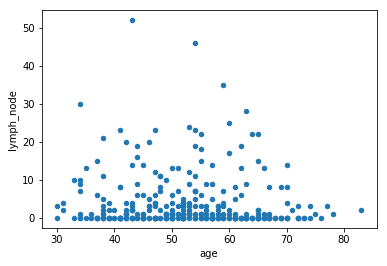

In [7]:
# Scatter plot with age and lymph nodes
haberman.plot(kind='scatter', x='age', y='lymph_node') ;
plt.show()

# Observation(s):

    * Looking at the above 2D scatter plot, survival status is not linearly seprable.
    * So will try to observe by applying color to the points by thier class-label/survival_status.

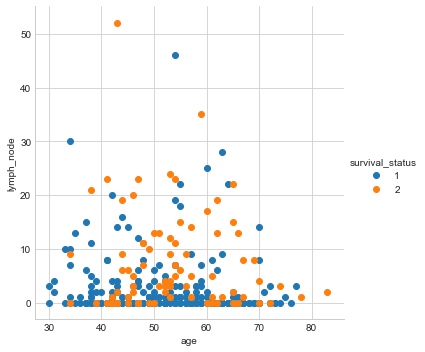

In [8]:
# 2-D Scatter plot with color-coding for each survival_status/class.

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "age", "lymph_node") \
   .add_legend();
plt.show();

# Observation(s):

    * Althouth survival state is not linearly seprable by looking at the above 2D scatter plot but survival ratio is  greater than died ratio by looking at the blue and orange points.
    * Because of overlap among survival states, unable to make any decision. 
    * Therefore, will check all combination of features to classify.

# Pair-plot :

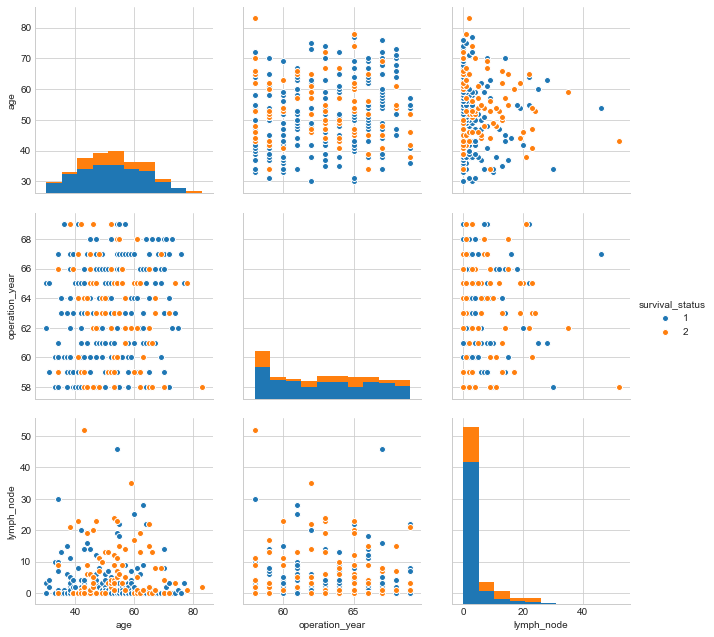

In [9]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", vars=['age','operation_year','lymph_node'], size=3);
plt.show()

# Observation(s):

    * It looks like we cannot distinguish the survial state easily with the help of above scatter plots as most of them are overlapping.

# Histogram, PDF, CDF :

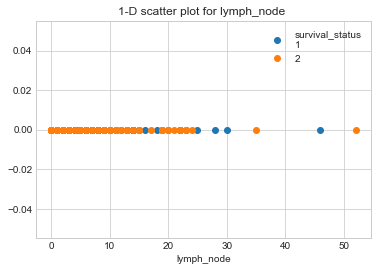

In [10]:
#1-D scatter plot using just one feature?
#1-D Scatter Plot of lymph_node
import numpy as np
one = haberman.loc[haberman["survival_status"] == 1]
two = haberman.loc[haberman["survival_status"] == 2]
plt.plot(one["lymph_node"], np.zeros_like(one["lymph_node"]), 'o', label = "survival_status\n" "1")
plt.plot(two["lymph_node"], np.zeros_like(two["lymph_node"]), 'o', label = "2")
plt.title("1-D scatter plot for lymph_node ")
plt.xlabel("lymph_node")
plt.legend()
plt.show()



# Observation(s):

    * By looking at the points we can observe theat many person died whose lymph node was between 0-25.


# Univariate Analysis

/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


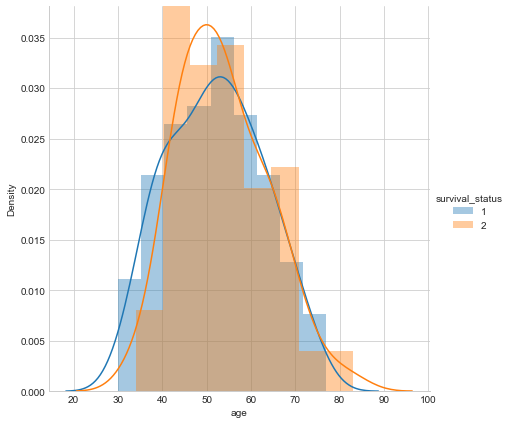

In [11]:
# Histogram for Age
#Better ways of visualizing 1-D scatter plots?
sns.FacetGrid(haberman, hue="survival_status", size=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("Density")
plt.show();

# Observation(s):

    * Using abobe plot we observe that at the age range from 30–84 the survival state of survived and death is same. So, using this datapoint we cannot conclude anything.


# Histogram for Operation Year

/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


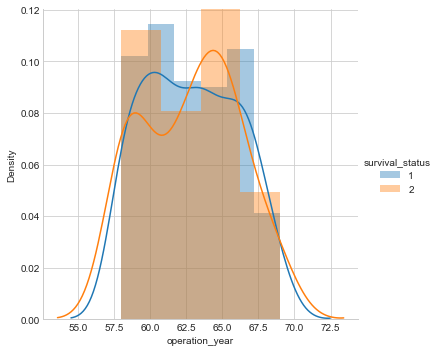

In [12]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.ylabel("Density")
plt.show();

# Observation(s): 
   
From the operation year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1961. More number of people are not survived in year of operation of 1964.
As PDF of both classification overlap on each other so we can not conclude anything.

# Histogram for Lymph Node

/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ruby.jha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


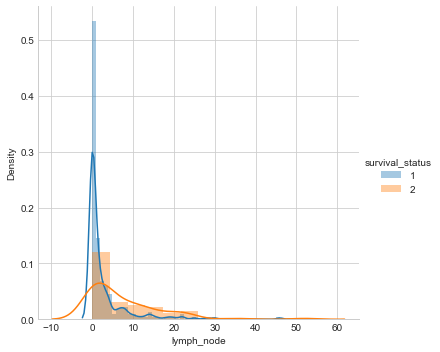

In [13]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "lymph_node") \
   .add_legend();
plt.ylabel("Density")
plt.show();


# Observation(s):

From the above PDFs both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.
    
lymph_node is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes. From that distibution we can infer that most survival patients have fallen in to zero lymph_node. It is still hard to classify but this is the best feature we can choose among all.
So we can build a model using if else condition based on lymph node as follows:
    
if lymph_node >=0 && lymph_node <=3:
    print("Patients survival chances are high.")
else :
    print("Patients survival chances are less.")
    
So from above PDF we can find out the patients survival state, but we cannot exactly say what percentage of patient will actually survive or die. To know that we have another distribution plot that is CDF.



# CDF for Long Survival

[0.18148292 0.01746894 0.00485248 0.00582298 0.00388199 0.0009705
 0.00194099 0.         0.         0.0009705 ]
[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


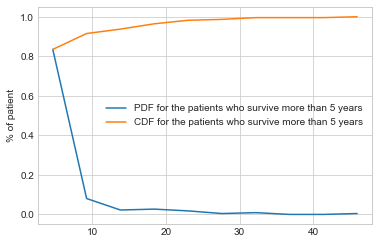

In [14]:
# alive means status=1 and dead means status =2
alive=haberman.loc[haberman["survival_status"]==1]
dead=haberman.loc[haberman["survival_status"]==2]

counts, bin_edges = np.histogram(alive['lymph_node'], bins=10, 
                                 density = True)
print(counts);
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for the patients who survive more than 5 years',
            'CDF for the patients who survive more than 5 years'])
plt.ylabel("% of patient")
plt.show()

# Observation(s):

From above CDF you can observe that orange line shows there is a 85% chance of long survival if number of lymph  nodes  are < 4. 

Also we see as number of lymph nodes increases survival chances also decreases means it is clearly observed that 80%  to 85% of people have good chances of survival if they have less no of lymph nodes and as nodes increases the survival status also decreases so as a result 100% of people have less chances of survival if nodes increases >40.

# CDF for Short Survival

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


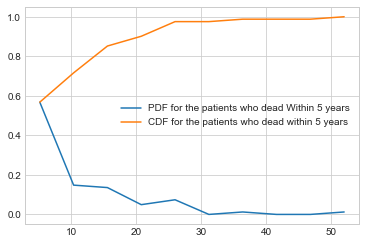

In [15]:
counts, bin_edges = np.histogram(dead['lymph_node'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for the patients who dead Within 5 years',
            'CDF for the patients who dead within 5 years'])
plt.show()

Nearly 55% of people who have lymph nodes less than 4 die and there are nearly 100% of people die if nodes are > 40

# Mean, Variance and Std-dev

In [16]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Survived Mean:")
print(np.mean(alive["lymph_node"]))
#Mean with an outlier.
print("\nOutlier : ",np.mean(np.append(alive["lymph_node"],50)));
print("\nDead Mean:")
print(np.mean(dead["lymph_node"]))

print("\nStd-dev:");
print(np.std(alive["lymph_node"]))
print(np.std(dead["lymph_node"]))


Means:
Survived Mean:
2.799107142857143

Outlier :  3.008888888888889

Dead Mean:
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632


# Observation(s):

The mean of lymph_node is more for people who died within 5 years than people who have survived for more than 5 years.
    

# Median, Percentile, Quantile, IQR, MAD

In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive["lymph_node"]))
#Median with an outlier
print(np.median(np.append(alive["lymph_node"],50)));
print(np.median(dead["lymph_node"]))


print("\nQuantiles:")
print(np.percentile(alive["lymph_node"],np.arange(0, 100, 25)))
print(np.percentile(dead["lymph_node"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["lymph_node"],90))
print(np.percentile(dead["lymph_node"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["lymph_node"]))
print(robust.mad(dead["lymph_node"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Observation(s):

Median shows 0 means most patients survived longer when they have 0 lymph node detected 4 for short survival.

Quantiles shows that nearly 50th% of lymph nodes are 0 in survived state and 75th% of patients have lymph nodes less than 3 and 25% patients are having lymph nodes more than 3.

In died state 75th% of patients have minimum 11 lymph nodes detected.

At 90th% if lymph node is <=8 then it has long survival status and if nodes are >20 then patients will be in died survival state

# Box plot and Whiskers

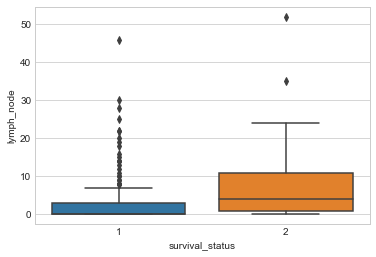

In [18]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.
sns.boxplot(x='survival_status',y='lymph_node', data=haberman)
plt.show()

# Observation(s):

In above box plot whiskers 25th percentile value of lymph node is 0 
,50th percentile is 1 and 75th percentile is nearly 4 for Long survival and threshold for it is 0 to 7. 

Also, for short survival 25th percentile value of lymph node is nearly 1 and 50th percentile 4 are nearly same as long survival 75th percentile is 12 and threshold is 0 to 25 nodes

So 75th percentile of long survival is nearly same as 50th percentile of short survival.



# Violin plots

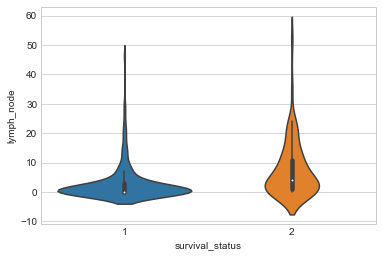

In [19]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="survival_status", y="lymph_node", data=haberman, size=8)
plt.show()

# Observation(s):   

The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

# Contour plot

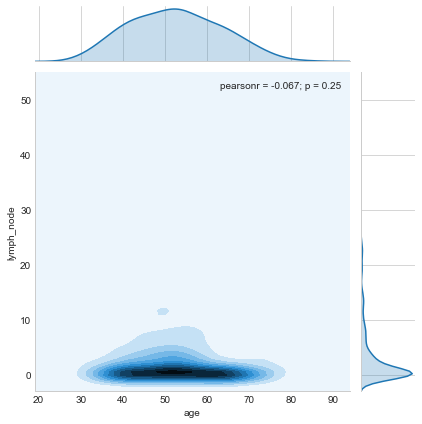

In [20]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="lymph_node", data=haberman, kind="kde");
plt.show()

# Observation(s):
    
It is observed that the density of point for long survival is more from age range 40–65 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter.

# Conclusion:

The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very difficult to classify.
Somehow lymph_node is giving some intution in the dataset to build the model.
  

# References:

https://www.appliedaicourse.com

https://www.kaggle.com/gilsousa/habermans-survival-data-set

http://zerosnones.net/understanding-data-through-exploratory-data-analysis/

https://www.youtube.com/watch?v=ItheeEyJzcM